# **Import data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir data

In [ ]:
!cp /content/drive/MyDrive/Data/train-v0.4.tar.gz data/train-v0.4.tar.gz

In [ ]:
%cd data/

/content/data


In [ ]:
!for f in *.tar.gz; do tar xf "$f"; done

In [ ]:
%cd ..

/content


# **Install Detectron2**

In [ ]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-uuifg1os
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-uuifg1os


'1.10.1+cu102'

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/detectron2_repo
  Running setup.py develop for detectron2
ERROR: Command errored out with exit status 1: /usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/content/detectron2_repo/setup.py'"'"'; __file__='"'"'/content/detectron2_repo/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' develop --no-deps Check the logs for full command output.


In [ ]:
#@title Install dependencies
# install dependencies: (use cu101 because colab has CUDA 10.1)
#!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 274 kB 33.0 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=a3f90b2ff6b529148e77aa7de3fa058ffccdb30f10ed7561f403bc6545d4906c
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-6eofxt3n
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-6eofxt3n
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263939 sha256=92d902c95957296b3864c135659cbd259110c376013ff4f917644686ee864891
  Stored in directory: /tmp/pip-ephem-wheel-cache-t6qc95ks/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pyc

In [ ]:
#@title Install detectron2
%cd /content/
# install detectron2:
!git clone https://github.com/facebookresearch/detectron2
%cd /content/detectron2
!pip install -r requirements.txt
!python setup.py install
!pip install git+https://github.com/facebookresearch/fvcore.git

/content
Cloning into 'detectron2'...
remote: Enumerating objects: 13863, done.
remote: Total 13863 (delta 0), reused 0 (delta 0), pack-reused 13863
Receiving objects: 100% (13863/13863), 5.69 MiB | 27.35 MiB/s, done.
Resolving deltas: 100% (10023/10023), done.
/content/detectron2
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
running install
running bdist_egg
running egg_info
creating detectron2.egg-info
writing detectron2.egg-info/PKG-INFO
writing dependency_links to detectron2.egg-info/dependency_links.txt
writing requirements to detectron2.egg-info/requires.txt
writing top-level names to detectron2.egg-info/top_level.txt
writing manifest file 'detectron2.egg-info/SOURCES.txt'
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not f

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

ImportError: ignored

In [ ]:
import os
import json
import cv2
import pandas as pd
import numpy as np

In [ ]:
print("Train images from train folder directory ",len(os.listdir("/content/data/train/images")))
print("Validation images from val folder directory ",len(os.listdir("/content/data/val/images")))

Train images from train folder directory  24119
Validation images from val folder directory  1269


In [ ]:
with open('/content/data/train/annotations.json') as json_file:
    train_coco_inp= json.load(json_file)
print("Keys of train annotation file: ",train_coco_inp.keys())
print("No of Categories(Classes) present: ",len(train_coco_inp['categories']))


Keys of train annotation file:  dict_keys(['categories', 'info', 'images', 'annotations'])
No of Categories(Classes) present:  273


In [ ]:
train_coco_inp['categories'][0]

{'id': 2578,
 'name': 'water',
 'name_readable': 'Water',
 'supercategory': 'food'}

In [ ]:
useless = []
os.chdir("/content/data/train/images")
for i in train_coco_inp['images']:
  im = cv2.imread(i['file_name'])
  if((im.shape[0]!=i['height']) or (im.shape[1]!=i['width'])):
    print(i, im.shape)
    useless.append(i)
  else:
    print(".",end="")

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
#Correcting the mismatched sizes in the annotation file
countr=0
for i in useless:
  for j in train_coco_inp['images']:
    if(i==j):
      temp = j['height']
      j['height'] = j['width']
      j['width'] = temp
# This will overwrite train annotations.json. If you dont want that- Change the file name.
with open("/content/data/train/annotations.json", "w") as outfile: 
    json.dump(train_coco_inp,outfile)

In [ ]:
with open('/content/data/val/annotations.json') as json_file:
    val_coco_inp= json.load(json_file)

In [ ]:
useless = []
os.chdir("/content/data/val/images")
for i in val_coco_inp['images']:
  im = cv2.imread(i['file_name'])
  if((im.shape[0]!=i['height']) or (im.shape[1]!=i['width'])):
    print(i, im.shape)
    useless.append(i)
  else:
    print(".",end="")

............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................{'id': 53879, 'file_name': '053879.jpg', 'width': 4608, 'height': 3456} (4608, 3456, 3)
....................................................................................................................................................................

In [ ]:
#Correcting the mismatched sizes in the validation annotation file
countr=0
for i in useless:
  for j in val_coco_inp['images']:
    if(i==j):
      temp = j['height']
      j['height'] = j['width']
      j['width'] = temp
# This will overwrite train annotations.json. If you dont want that- Change the file name.
with open("/content/data/val/annotations.json", "w") as outfile: 
    json.dump(val_coco_inp,outfile)

# **Train the model using Dectectron2**

In [ ]:
os.chdir("/content")

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.10.0+cu111 True


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode

Since the annotation file that we have corresponds to COCO-format, lets use a function from Detectron2 which helps us to register the
* Train directory and train annotation file
* Test directory and test annotation file

In [ ]:
from detectron2.data.datasets import register_coco_instances
# Change the paths of the below mentioned directories and files if you have made any changes.
train_annotations_path = "/content/data/train/annotations.json"
train_images_path = "/content/data/train/images/"
val_annotations_path = "/content/data/val/annotations.json"
val_images_path = "/content/data/val/images/"


register_coco_instances("my_dataset_train", {},train_annotations_path, train_images_path)
register_coco_instances("my_dataset_val", {},val_annotations_path, val_images_path)

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
# Creating a config variable
cfg = get_cfg()
# Check the model zoo and use any of the models ( from detectron2 github repo)
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
# Loading pre trained weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
#Learning Rate: 
cfg.SOLVER.BASE_LR = 0.00025  
#No of Interations
cfg.SOLVER.MAX_ITER = 500
#Images per batch (Batch Size) 
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   
#No of Categories(Classes) present
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 273

In [ ]:
#Output path where models and related info will be stored (The folder will get created if not present already)
# A folder called output is created where you have your models stored. Storing this in google drive is better 
# because you can access it later. Before you run this cell make sure you mount your gdrive
cfg.OUTPUT_DIR = "/content/output/mask_rcnn/"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [ ]:
!nvidia-smi

Sun Dec  5 11:14:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P8    29W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)

[12/05 11:14:47 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:06, 25.6MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (274, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (274,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (1092, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (1092,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the mode

In [ ]:
trainer.train()

[12/05 11:15:06 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/05 11:15:26 d2.utils.events]:  eta: 0:07:37  iter: 19  total_loss: 6.933  loss_cls: 5.655  loss_box_reg: 0.5649  loss_mask: 0.6917  loss_rpn_cls: 0.006918  loss_rpn_loc: 0.00918  time: 0.9463  data_time: 0.0312  lr: 9.7405e-06  max_mem: 1873M
[12/05 11:15:45 d2.utils.events]:  eta: 0:07:20  iter: 39  total_loss: 6.551  loss_cls: 5.339  loss_box_reg: 0.5579  loss_mask: 0.6918  loss_rpn_cls: 0.01654  loss_rpn_loc: 0.01236  time: 0.9442  data_time: 0.0120  lr: 1.9731e-05  max_mem: 1927M
[12/05 11:16:03 d2.utils.events]:  eta: 0:07:00  iter: 59  total_loss: 5.895  loss_cls: 4.559  loss_box_reg: 0.6899  loss_mask: 0.693  loss_rpn_cls: 0.02629  loss_rpn_loc: 0.01291  time: 0.9394  data_time: 0.0096  lr: 2.972e-05  max_mem: 1928M
[12/05 11:16:23 d2.utils.events]:  eta: 0:06:40  iter: 79  total_loss: 4.427  loss_cls: 3.131  loss_box_reg: 0.5106  loss_mask: 0.6913  loss_rpn_cls: 0.01453  loss_rpn_loc: 0.01078  time: 0.9494  data_time: 0.0143  lr: 3.9711e-05  max_mem: 2687M
[12/05 11:16:42 d

In [ ]:
#The model gets saved as model_final.pth inside cfg.OUTPUT_DIR path 
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("my_dataset_val", )
predictor = DefaultPredictor(cfg)

In [ ]:
# Evaluating the model on Val set
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader


evaluator = COCOEvaluator("my_dataset_val", cfg, False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
valResults = inference_on_dataset(trainer.model, val_loader, evaluator)


WARNING [12/05 11:23:13 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [12/05 11:23:13 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/05 11:23:13 d2.data.datasets.coco]: Loaded 1269 images in COCO format from /content/data/val/annotations.json
[12/05 11:23:14 d2.data.build]: Distribution of instances among all 273 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
| beetroot-st.. | 2            | green-bean-.. | 3            | watermelon-.. | 9            |
| pizza-with-.. | 3            | pizza-with-.. | 7            | applesauce-.. | 3            |
| quiche-with.. | 1            | sweet-potato  | 6            | country-fries | 5            |
| potato-gnoc.. | 4

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir output

In [ ]:
train_metadata = MetadataCatalog.get("my_dataset_train")

In [ ]:
with open('/content/data/train/annotations.json') as json_file:
    train_coco_inp= json.load(json_file)

In [ ]:
image_id = train_coco_inp['images'][0]['file_name']
print(image_id)

065537.jpg


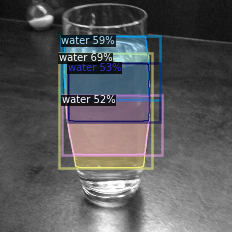

In [ ]:
img_path = "/content/data/train/images/" + str(image_id)
im = cv2.imread(img_path)
# outputs here store your model predictions for image "im"
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1],
                   metadata=train_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW
    )

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])